# Task - 11 (EDA + Missing Value + Outlier + ML Model)

Dataset: Adult  
Dataset Description: 

Instructions:  
1. Give a detailed **data description** and objective.
2. Import the data and perform basic pandas operations.
3. Univariate Analysis = PDF, Histograms, Boxplots, Countplots, etc..  
     Understand the probability and frequency distribution of each numerical column  
     Understand the frequency distribution of each categorical Variable/Column  
     Mention observations after each plot.  
4. Bivariate Analysis  
     Discover the relationships between numerical columns using Scatter plots, hexbin plots, pair plots, etc..  
     Identify the patterns between categorical and numerical columns using swarmplot, boxplot, barplot, etc..  
     Mention observations after each plot.  
5. In the above steps you might have encountered many missing values and outliers.   
     Find and treat the outliers and missing values in each column 😥  
     Read this Kaggle Notebook and understand various ways to detect and handle outliers. Try to implement the same.   
     Outliers are **The Silent Killers**
6. Conclusion of EDA (Mention Observations)  
7. Perform feature transformation:  
     For Numerical Features = Do Column Standardization
     For Categorical = If more than 2 categories, use dummy variables. Otherwise convert the feature to Binary.
8. Build various Machine Learning models considering ‘income’ as target variable.  
9. Create a table to compare the performance of each of the ML Model.  
10. Read the research papers mentioned below & rethink the missing value treatment and feature engineering aspect. Try to     document the things you are implementing from the research paper.  


# ADULT INCOME PREDICTION (KAGGLE-DATASET)

This data was extracted from the **1994 Census bureau database** by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)).    
The prediction task is to determine whether a person makes over $ 50,000/Year.

This is a binary classification problem where we have to predict whether a person earns over $ 50,000/Year or not. The scoring function to optimize is accuracy. The notebook follows the following steps to analyse the data and build predictive models.
* Data cleaning and preprocessing
* Exploratory data analysis
* Modelling: I have tried out different classification algorithms.
  * Random forest
  * XGBoost
  * Naive Bayes
  * Logistic regression
  * CatBoost

These models were then optimized by tuning the hyper-parameters through Grid Search, keeping a close check on the cross-validation scores to prevent overfitting. Thereafter I also tried out stacking different models together to improve the accuracy but it didn't improve the accuracy sigificantly.

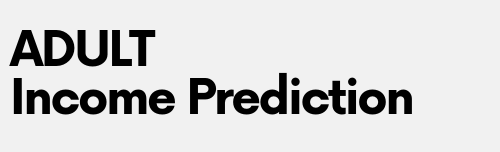

## Data cleaning and preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
%matplotlib inline

In [2]:
Data = pd.read_csv('adult.csv')
Data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [3]:
Data.shape

(48842, 15)

**ANALYSIS**    
Number of Rows : 48,842   
Number of columns : 15   

In [4]:
Data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
Data.describe().reset_index().T

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.71051,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [7]:
print('Null values in age : ', sum(Data['age'].isnull()))
print('Null values in workclass : ', sum(Data['workclass'].isnull()))
print('Null values in fnlwgt : ', sum(Data['fnlwgt'].isnull()))
print('Null values in education : ', sum(Data['education'].isnull()))
print('Null values in educational-num : ', sum(Data['educational-num'].isnull()))
print('Null values in marital-status : ', sum(Data['marital-status'].isnull()))
print('Null values in occupation : ', sum(Data['occupation'].isnull()))
print('Null values in relationship : ', sum(Data['relationship'].isnull()))
print('Null values in race : ', sum(Data['race'].isnull()))
print('Null values in gender : ', sum(Data['gender'].isnull()))
print('Null values in capital-gain : ', sum(Data['capital-gain'].isnull()))
print('Null values in capital-loss : ', sum(Data['capital-loss'].isnull()))
print('Null values in hours-per-week : ', sum(Data['hours-per-week'].isnull()))
print('Null values in native-country : ', sum(Data['native-country'].isnull()))
print('Null values in income : ', sum(Data['income'].isnull()))

Null values in age :  0
Null values in workclass :  0
Null values in fnlwgt :  0
Null values in education :  0
Null values in educational-num :  0
Null values in marital-status :  0
Null values in occupation :  0
Null values in relationship :  0
Null values in race :  0
Null values in gender :  0
Null values in capital-gain :  0
Null values in capital-loss :  0
Null values in hours-per-week :  0
Null values in native-country :  0
Null values in income :  0


**ANALYSIS**   
It is showing that our data has no NULL values (It cannot read '?'). We have to tell our data that '?' is a missing parameter.

In [8]:
for i,j in zip(Data.columns,(Data.values.astype(str) == '?').sum(axis = 0)):
    if j > 0:
        print(str(i) + ' : ' + str(j) + ' records')

workclass : 2799 records
occupation : 2809 records
native-country : 857 records


So we finally got missing values.

### How to handle missing values?

We can either drop them (Not desirable because we may loose useful information) or we can replace them (Keeping in mind our independent parameter)

Interestingly, all the three are categorical values. We can use 'One-Hot encoding' here.

## Exploratory Data analysis

**AGE ANALYSIS**

In [9]:
Data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

<AxesSubplot:xlabel='age'>

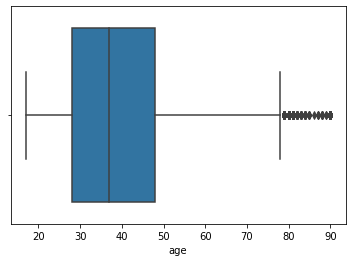

In [10]:
sns.boxplot(Data['age'])

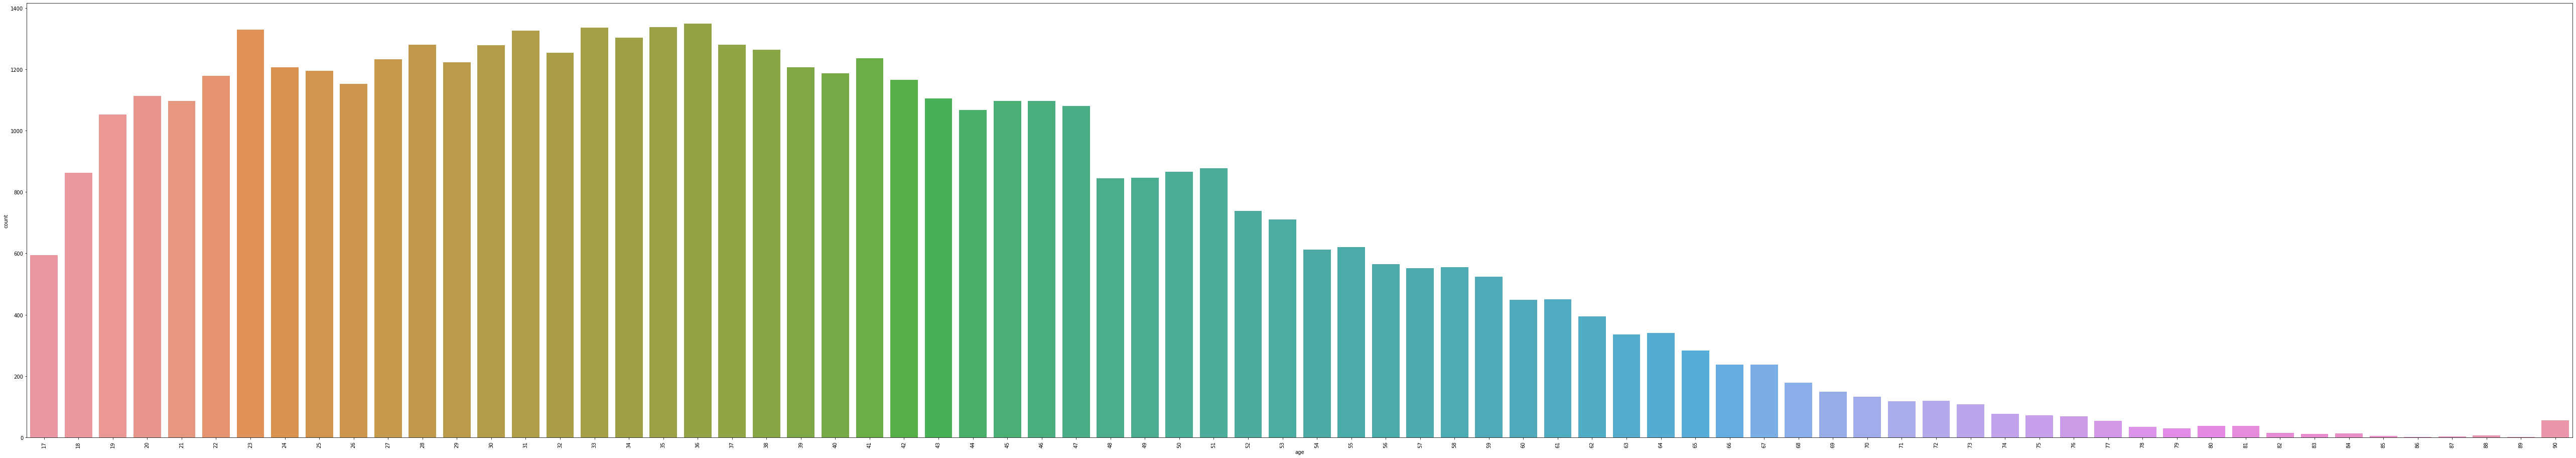

In [11]:
Fig = plt.figure(figsize = (200, 35))
A1 = Fig.add_subplot(222)
A = sns.countplot(Data['age'] , ax = A1)
for item in A.get_xticklabels():
    item.set_rotation(90)    
plt.show()

**Outcome** :   
People aging more then **77-78** are considered as outliers.    
People of **age 23** are having maximum count of 1300+    

**INCOME AND AGE ANALYSIS**

<AxesSubplot:xlabel='income', ylabel='age'>

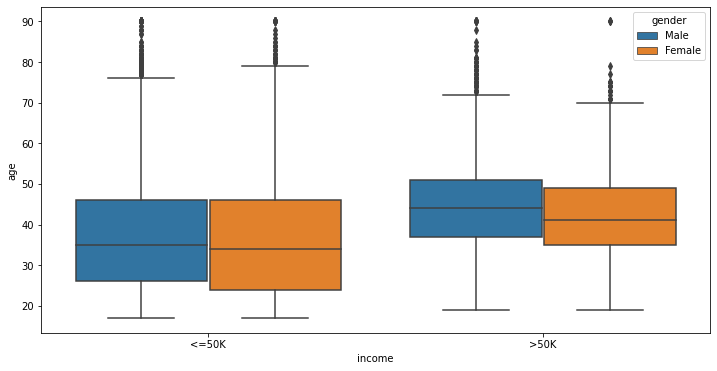

In [12]:
plt.figure(figsize = (12,6))
sns.boxplot(x = "income", y = "age", data = Data, hue = 'gender')

**Outcome** :    
For groups having income < 50,000 : Mean age of males are around 35,000 and for females are around 34,000.   
For groups having income < 50,000 : Mean age of males are around 45,000 and that for females are around 41,000.

**WORKCLASS ANALYSIS**

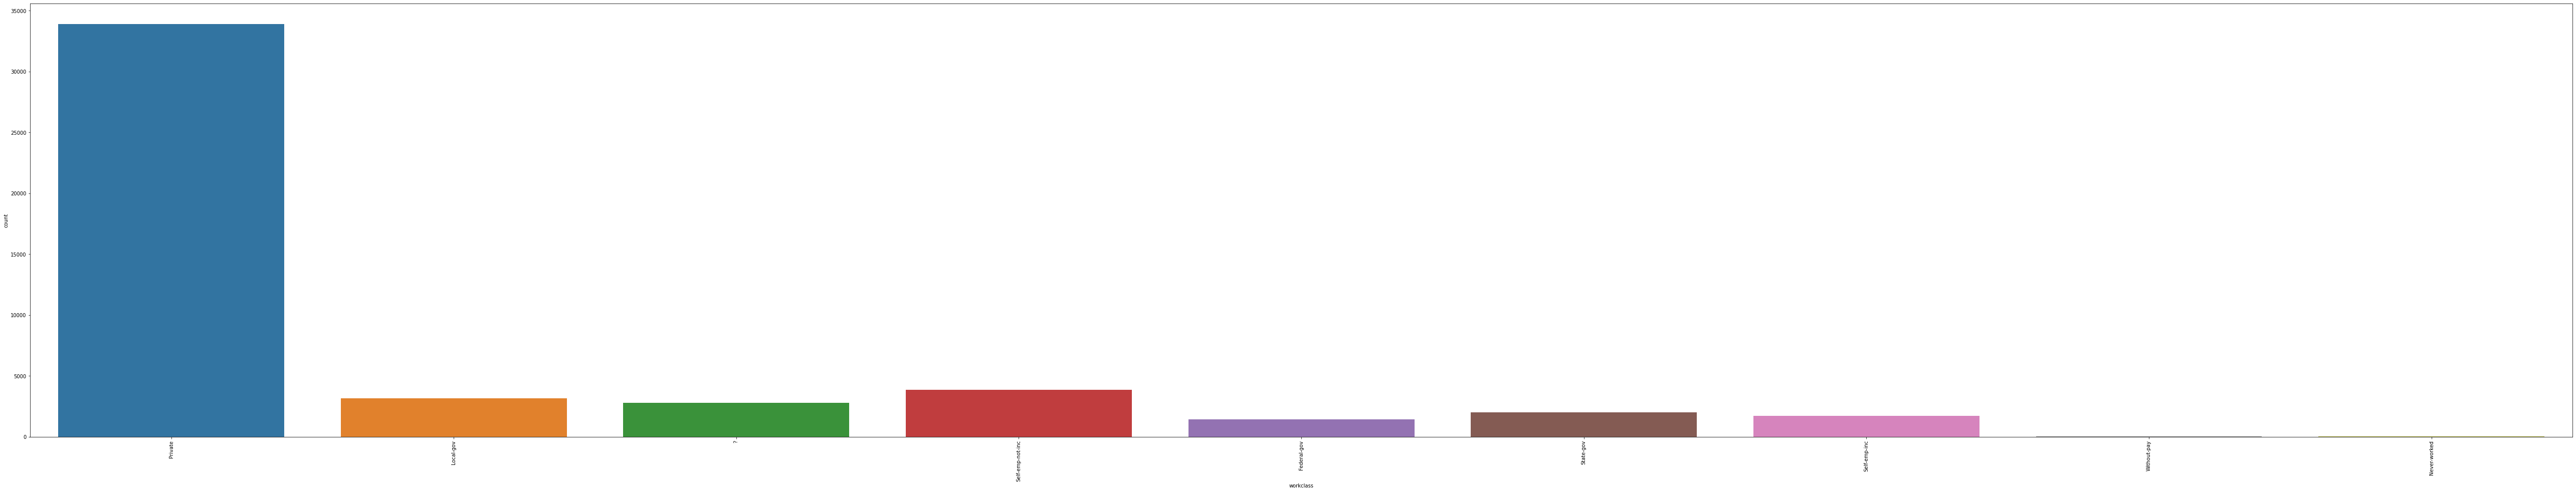

In [13]:
Fig = plt.figure(figsize = (200, 35))
A2 = Fig.add_subplot(222)
B = sns.countplot(Data['workclass'] , ax = A2)
for item in B.get_xticklabels():
    item.set_rotation(90)    
plt.show()

**Outcome** :   
Highest are Private workers with count of around 34,000.   
Second highest are self employed with count of around 5,000.   

**EDUCATION**

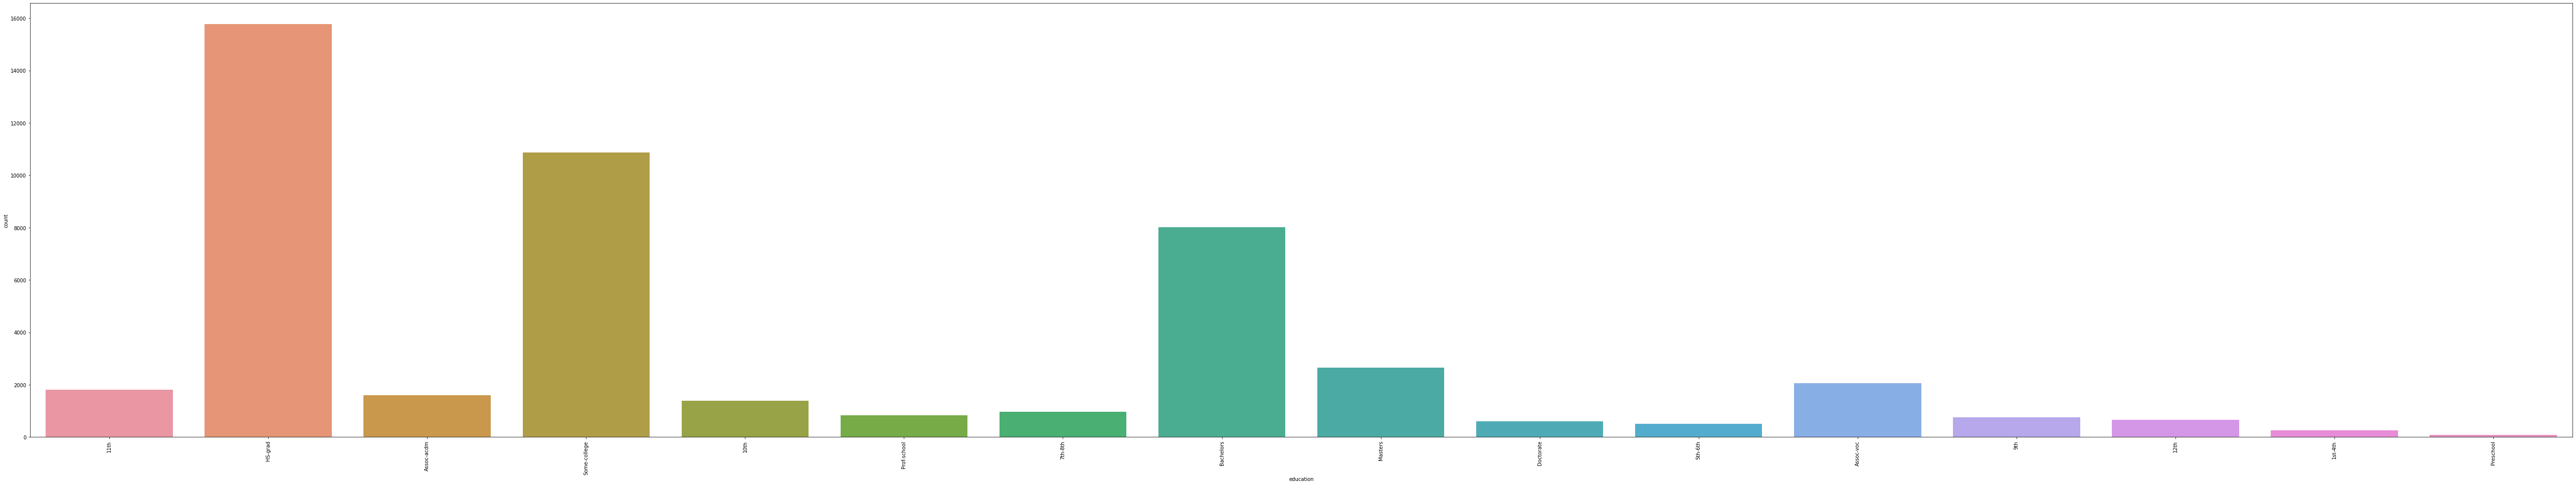

In [14]:
Fig = plt.figure(figsize = (200, 35))
A3 = Fig.add_subplot(222)
C = sns.countplot(Data['education'] , ax = A3)
for item in C.get_xticklabels():
    item.set_rotation(90)    
plt.show()

**Outcome** :   
HS-Graduates are the highest one having 16,000 count.    
Some-college are second highest having 10,000+ count.     
Bachelors degree holders rank 3 with around 8,000+ count.   

**EDUCATIONAL-NUM ANALYSIS**


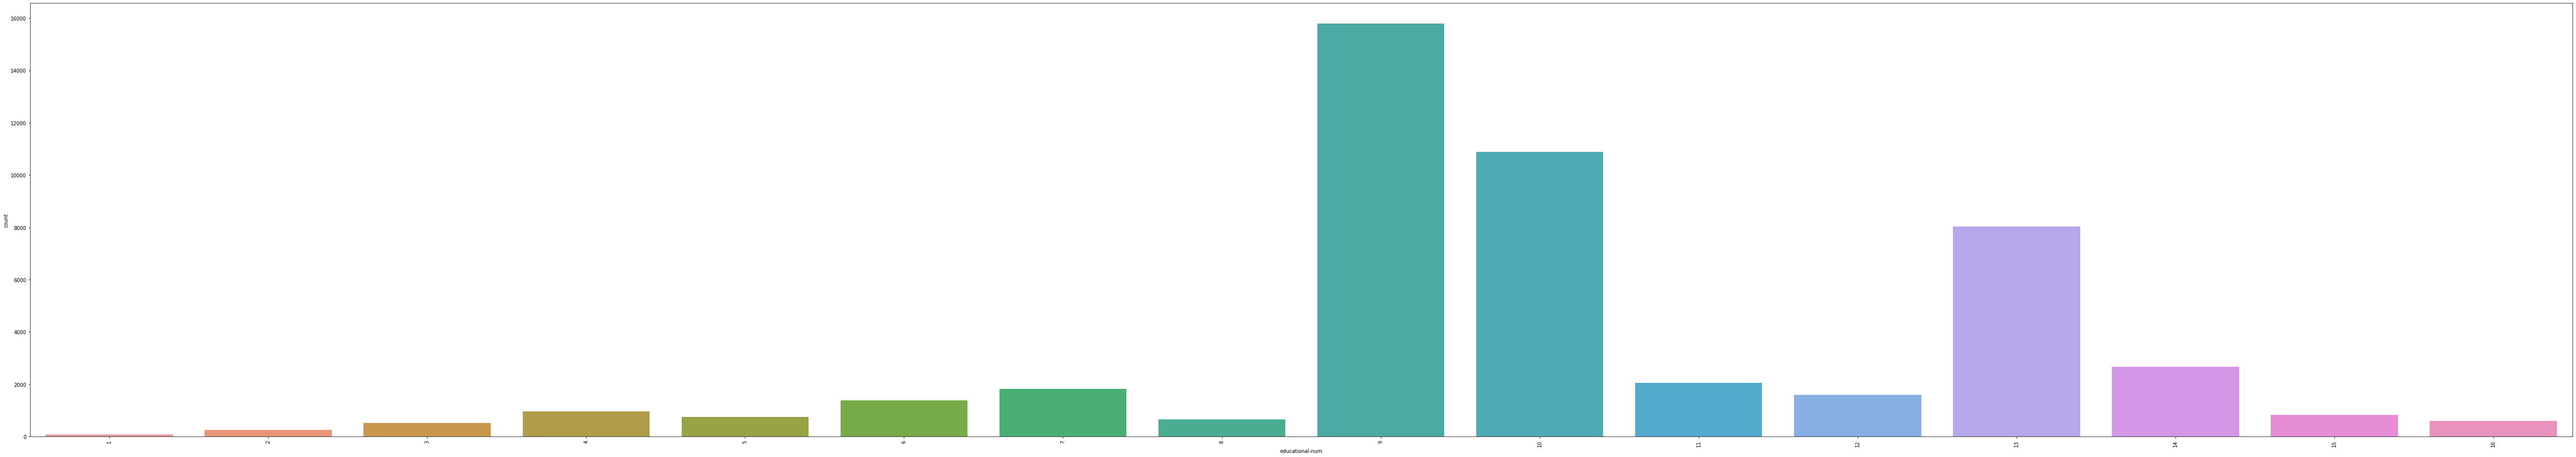

In [15]:
Fig = plt.figure(figsize = (200, 35))
A4 = Fig.add_subplot(222)
D = sns.countplot(Data['educational-num'] , ax = A4)
for item in D.get_xticklabels():
    item.set_rotation(90)    
plt.show()

**Outcome** :   
Educational-num 9 has the highest count of around 15,000.    

**MARITAL STATUS**

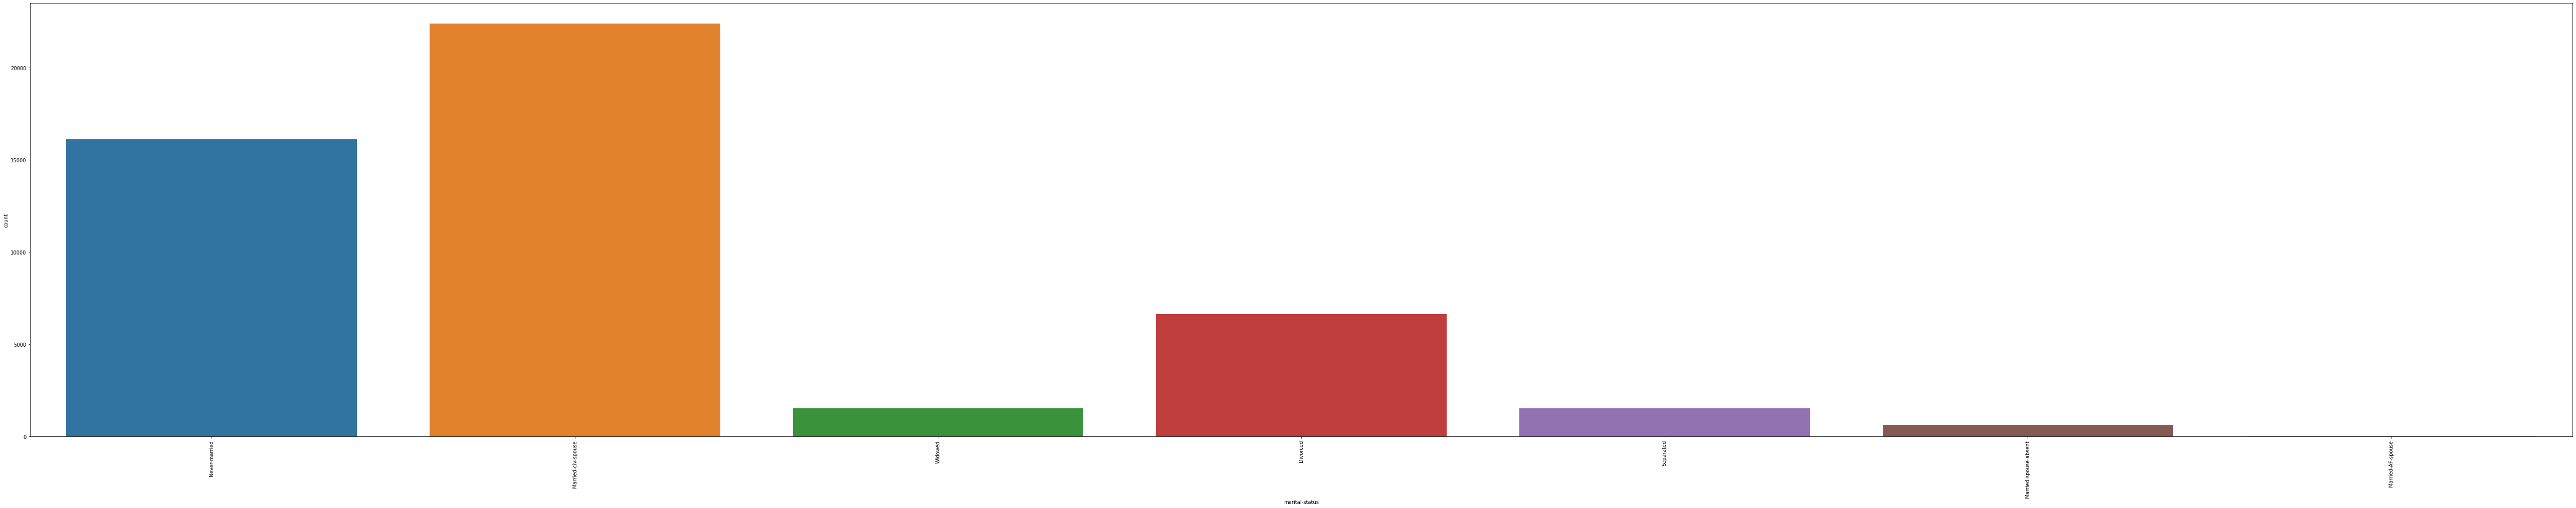

In [16]:
Fig = plt.figure(figsize = (200, 35))
A5 = Fig.add_subplot(222)
E = sns.countplot(Data['marital-status'] , ax = A5)
for item in E.get_xticklabels():
    item.set_rotation(90)    
plt.show()

**Outcome** :  
Married with spouse are the highest with count of around 20,000+   
Second-ones are the never-married ones with count of around 15,000+   
Third-ones are Divorced ones with count of 5,000+   

**OCCUPATION**

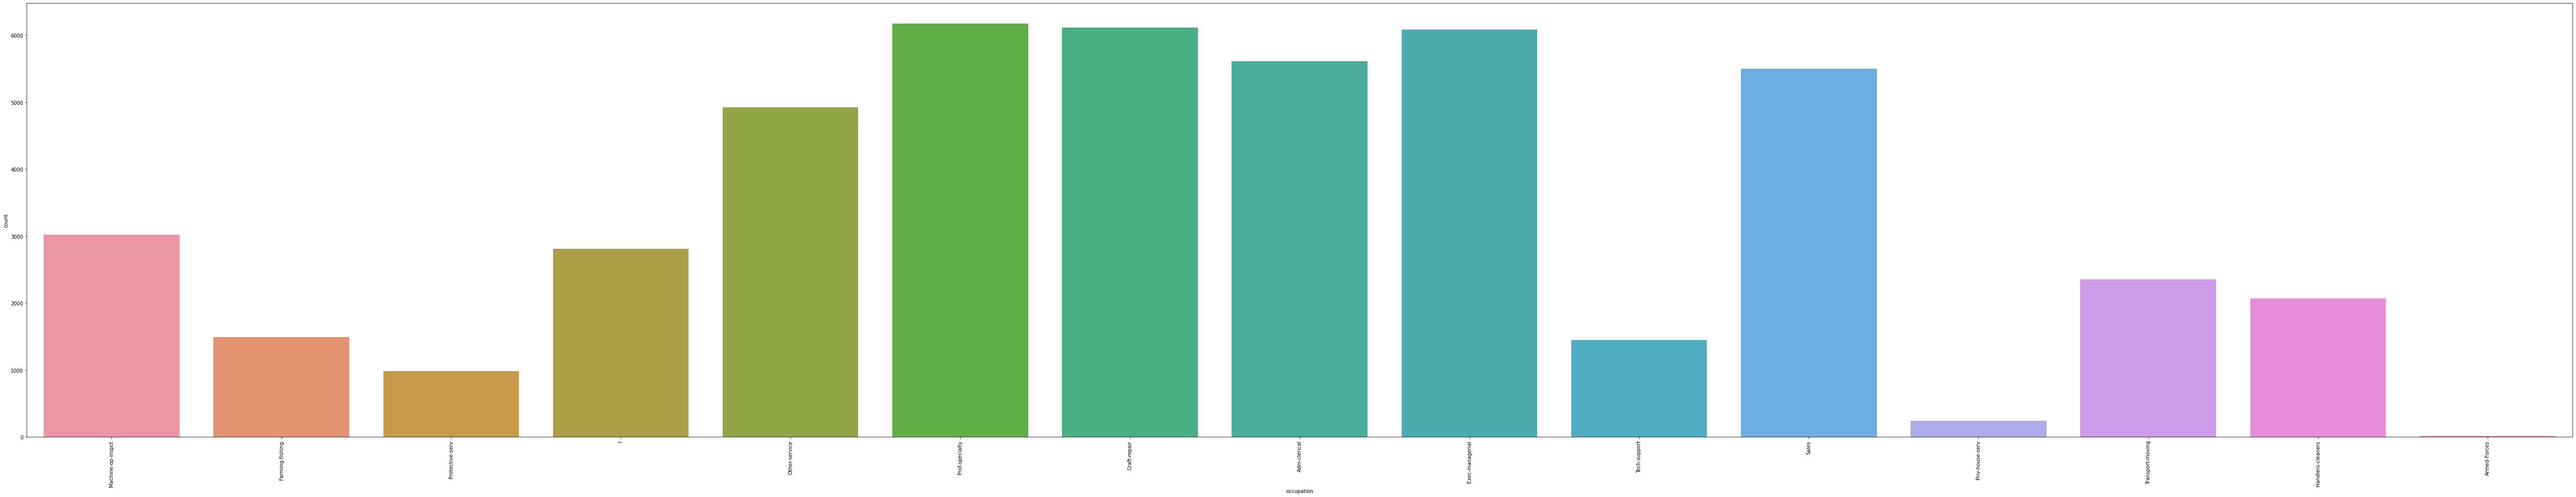

In [17]:
Fig = plt.figure(figsize = (200, 35))
A6 = Fig.add_subplot(222)
F = sns.countplot(Data['occupation'] , ax = A6)
for item in F.get_xticklabels():
    item.set_rotation(90)    
plt.show()

**Outcome** : 
Occupations are 
1. Machine operation inspector
2. Farming/Fishing
3. Protective services
4. ?
5. Other services
6. Prof. speciality - 6000+   
7. Craft/Repairing - 6000+   
8. Admin/Clerical
9. Executive/managerial
10. Tech support
11. Sales
12. Private house service
13. Transport/Moving
14. Handlers/Cleaners
15. Armed Forces 

**RELATIONSHIP**

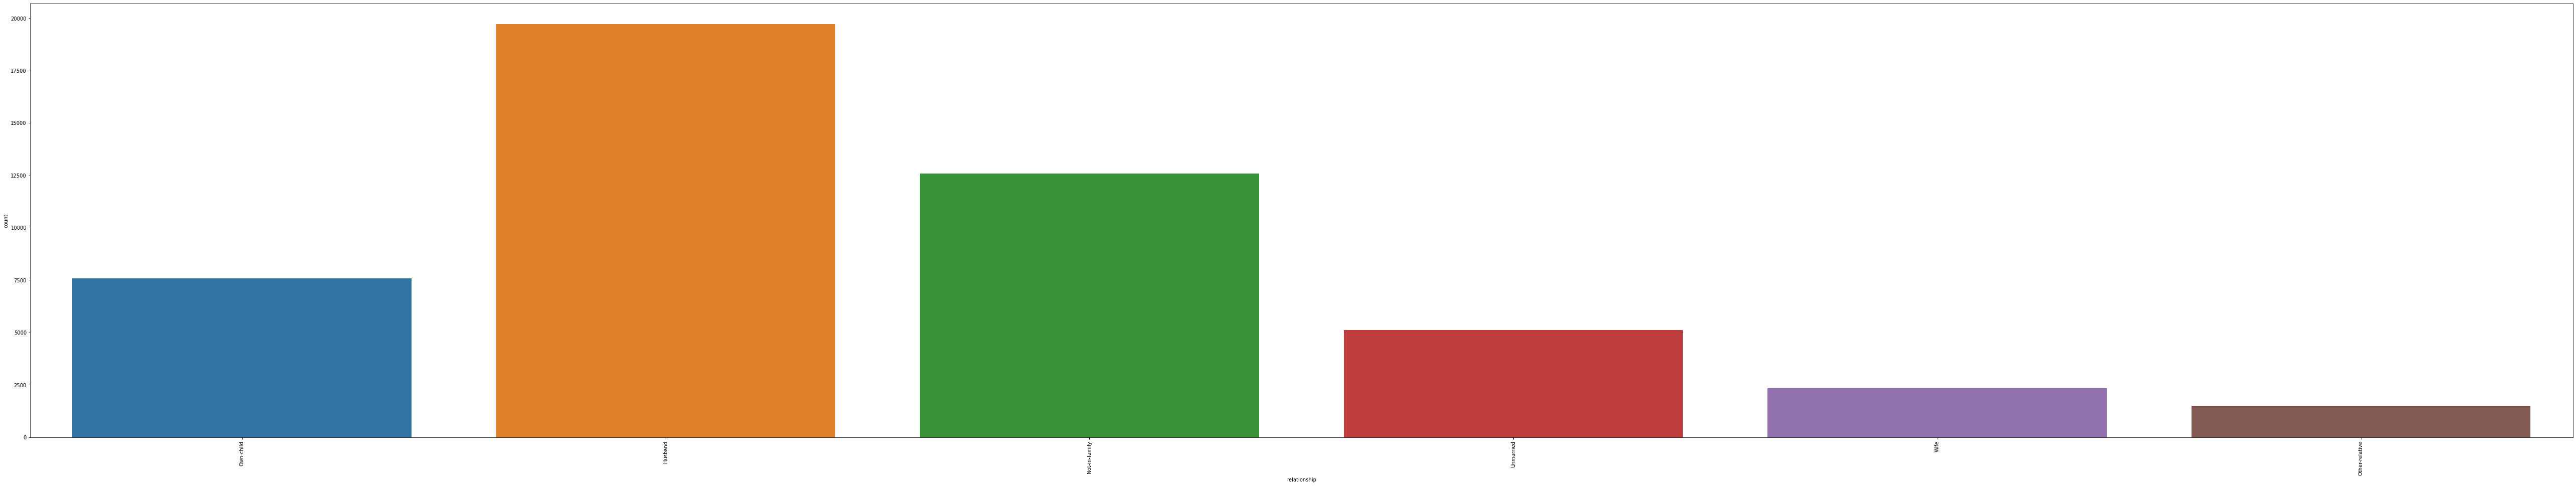

In [18]:
Fig = plt.figure(figsize = (200, 35))
A7 = Fig.add_subplot(222)
G = sns.countplot(Data['relationship'] , ax = A7)
for item in G.get_xticklabels():
    item.set_rotation(90)    
plt.show()

**Outcome** :   
Top 3 are :   
Husband : 18,000-19,000   
Not in family : Around 12,500   
Own-child : 7,500   

**NATIVE COUNTRY**

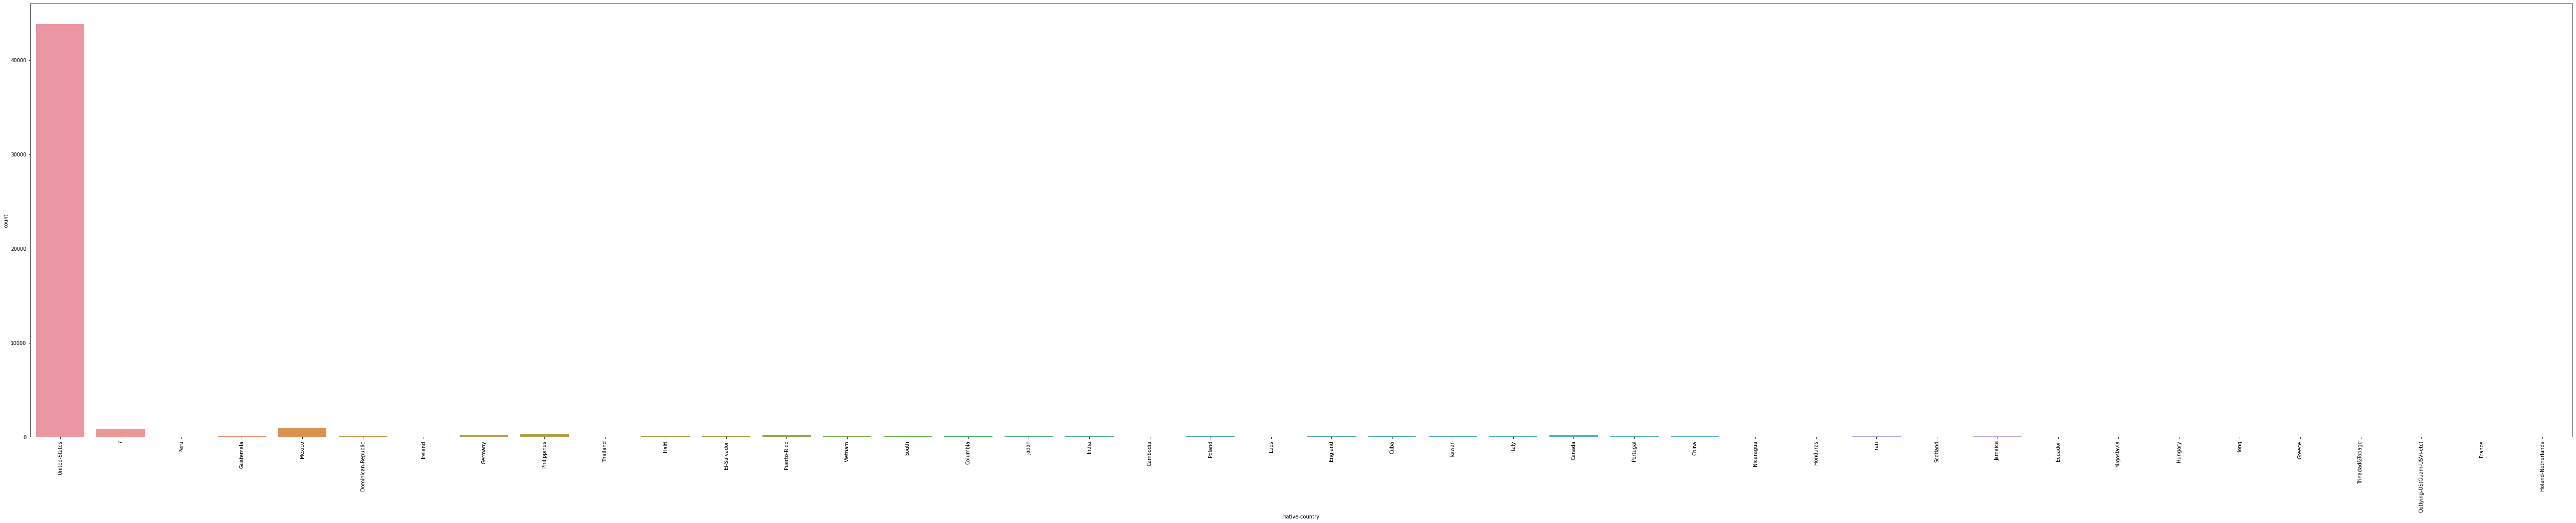

In [19]:
Fig = plt.figure(figsize = (200, 35))
A8 = Fig.add_subplot(222)
H = sns.countplot(Data['native-country'] , ax = A8)
for item in H.get_xticklabels():
    item.set_rotation(90)    
plt.show()

**Outcome** : 
Top 3 are :   
United States : Around 45,000   
Mexico : Around 1,000-2,000   

**RACE**

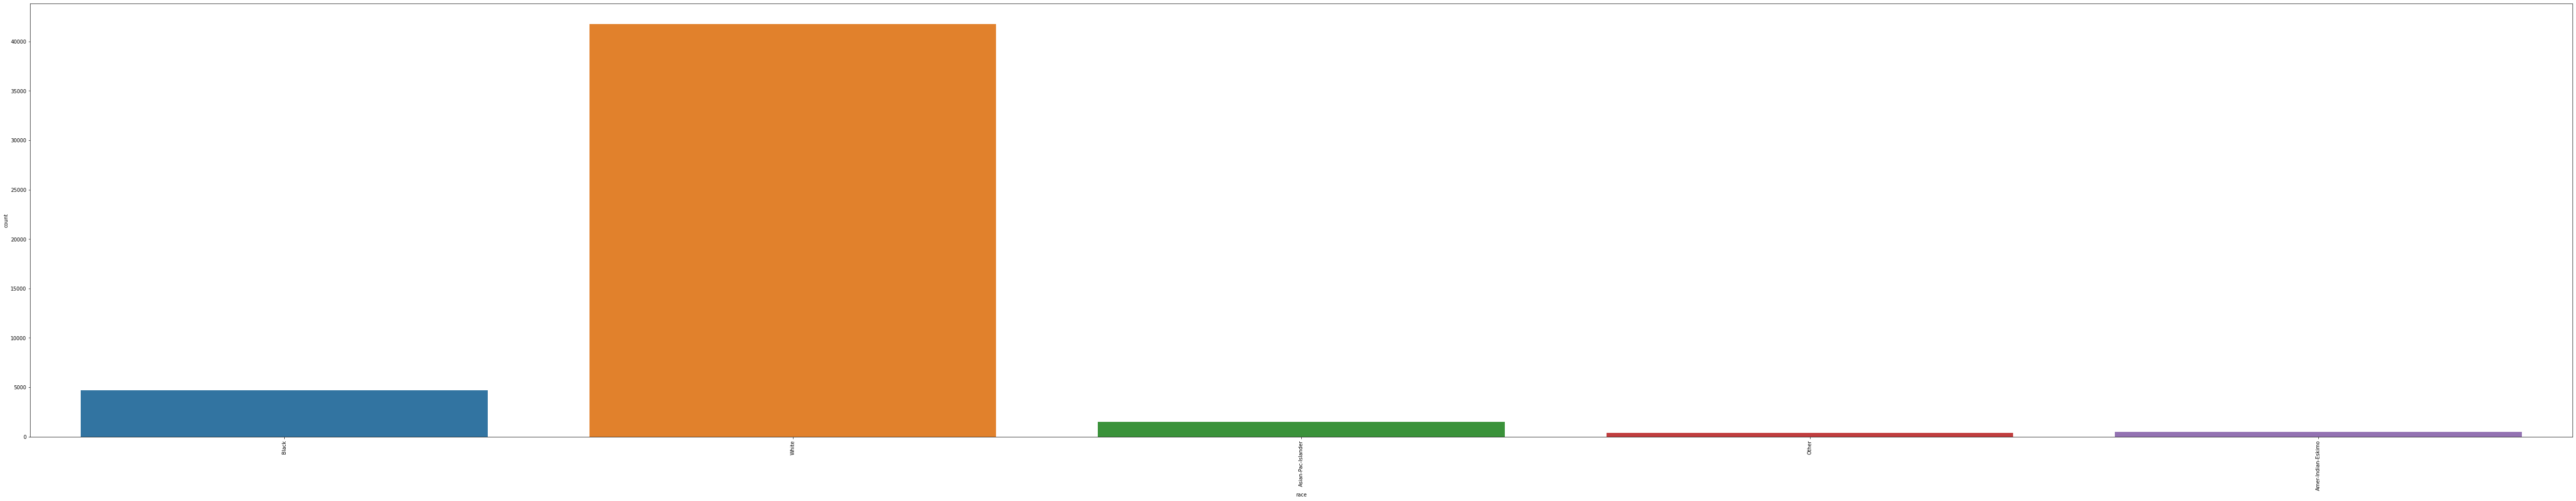

In [20]:
Fig = plt.figure(figsize = (200, 35))
A9 = Fig.add_subplot(222)
I = sns.countplot(Data['race'] , ax = A9)
for item in I.get_xticklabels():
    item.set_rotation(90)    
plt.show()

## Correlation Matrix

In [21]:
display(Data.corr())

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


**Outcome** : None of the values are highly corelated. It should be around 1 or -1 for that.

## Heatmap

Text(0.5, 1.0, 'Heatmap showing correlations between numerical data')

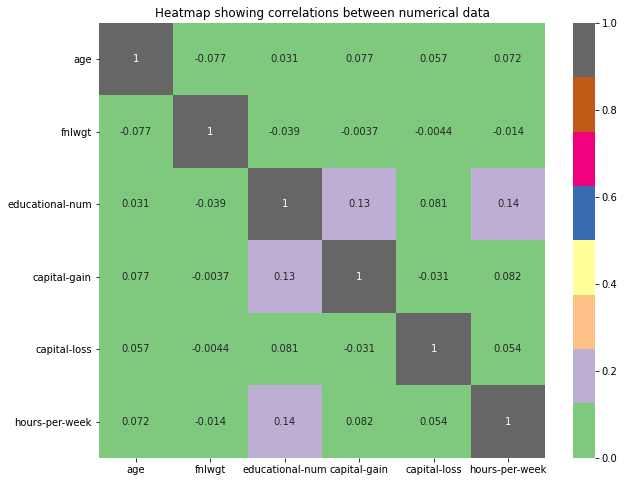

In [22]:
plt.figure(figsize = (10,8))  
sns.heatmap(Data.corr(),vmin = 0, vmax = 1, cmap = 'Accent', annot=True)
Data.corr()
plt.title('Heatmap showing correlations between numerical data')

**Outcome** : Again not much correlation between various features.

## More EDA (Co-Related)

### 1. Comparison between Income and Education

As we all know that Income and education are related with each other. Let us analyze how this Data is varying graphically.

In [23]:
edu_level = {}
for x,y in Data[['educational-num','education']].drop_duplicates().itertuples(index=False):
    edu_level[y] = x

Text(0, 0.5, 'Proportion of population')

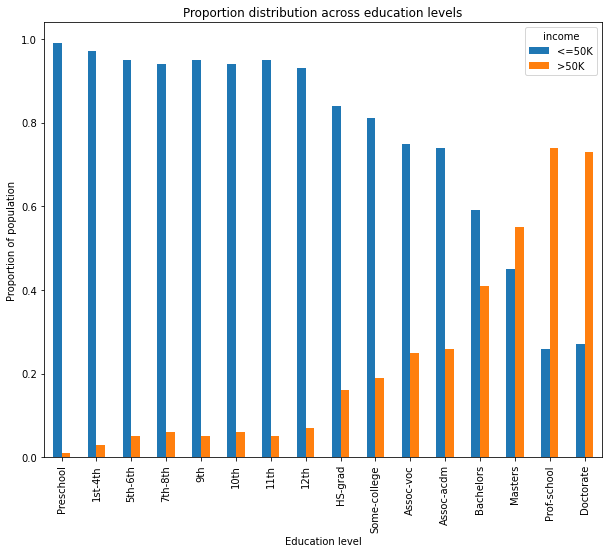

In [24]:
education = round(pd.crosstab(Data.education, Data.income).div(pd.crosstab(Data.education, Data.income).apply(sum,1),0),2)
education = education.reindex(sorted(edu_level, key = edu_level.get, reverse = False))

ax = education.plot(kind ='bar', title = 'Proportion distribution across education levels', figsize = (10,8))
ax.set_xlabel('Education level')
ax.set_ylabel('Proportion of population')

**Outcome** :    
As one can interprete from tha graph that as the Education level increases, the proportion of people who earn more than 50,000/year increases as well.   
However, after obtaining a Master's degree only, the proportion of people earning more than 50,000/year becomes a majority.

### 2. Comparison between Income and Gender

Text(0, 0.5, 'Proportion of population')

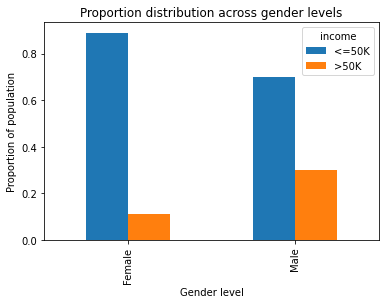

In [25]:
gender = round(pd.crosstab(Data.gender, Data.income).div(pd.crosstab(Data.gender, Data.income).apply(sum,1),0),2)
gender.sort_values(by = '>50K', inplace = True)
ax = gender.plot(kind ='bar', title = 'Proportion distribution across gender levels')
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')

**Outcome** :   
Proportion of males earning more then 50,000/year is double that of the females.   
Proportion of females earning less than 50,000/year is higher than males.   

### 3. Comparison between Income and Workclass

Text(17.200000000000003, 0.5, 'Proportion of population')

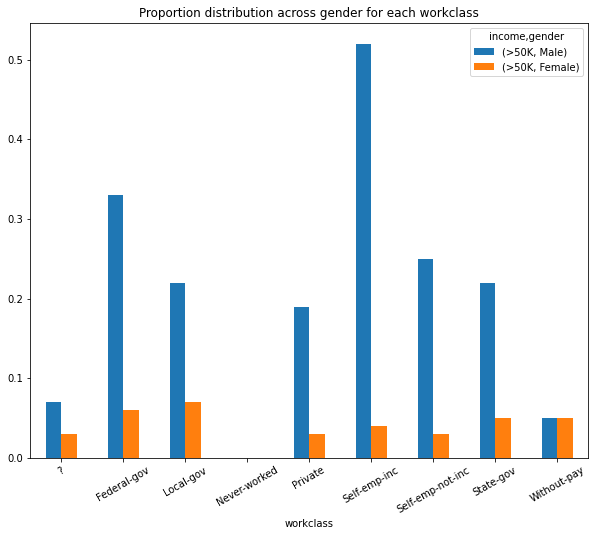

In [26]:
gender_workclass = round(pd.crosstab(Data.workclass, [Data.income, Data.gender]).div(pd.crosstab(Data.workclass, [Data.income, Data.gender]).apply(sum,1),0),2)
gender_workclass[[('>50K','Male'), ('>50K','Female')]].plot(kind = 'bar', title = 'Proportion distribution across gender for each workclass', figsize = (10,8), rot = 30)
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')

### 4. Comparison between Income and Race

Text(0, 0.5, 'Proportion of population')

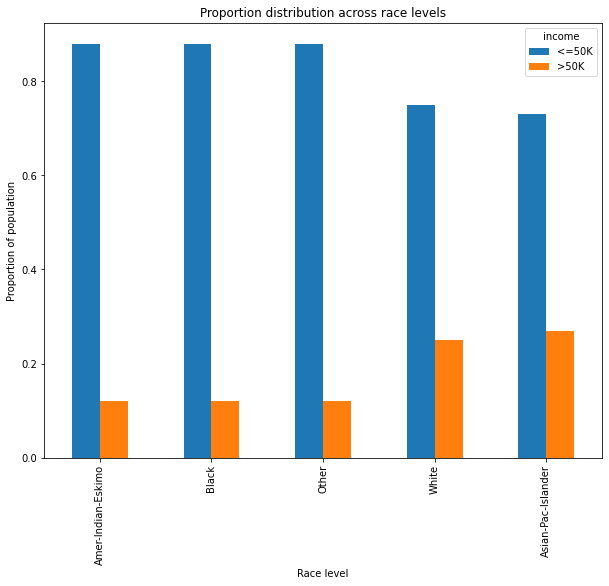

In [27]:
race = round(pd.crosstab(Data.race, Data.income).div(pd.crosstab(Data.race, Data.income).apply(sum,1),0),2)
race.sort_values(by = '>50K', inplace = True)
ax = race.plot(kind ='bar', title = 'Proportion distribution across race levels', figsize = (10,8))
ax.set_xlabel('Race level')
ax.set_ylabel('Proportion of population')

**Outcome** : 
People with income less than 50,000/year are in a very large proportion among various races.   

In [28]:
print(Data['native-country'].value_counts())
not_from_US = np.sum(Data['native-country']!= 'United-States')
print('\n')
print(not_from_US, 'people not from the United States. ')

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                        

We are converting categorical features into binary features since there is a huge gap between people from US and not from the US.

In [29]:
Data['native-country'] = (Data['native-country']=='United-States')*1
#data['US_or_not']=np.where(data['native.country']=='United-States',1,0)

In [30]:
Data.select_dtypes(exclude=[np.number]).head()

,workclass,education,marital-status,occupation,relationship,race,gender,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,>50K
4,?,Some-college,Never-married,?,Own-child,White,Female,<=50K


In [31]:
Data = Data.applymap(lambda x: np.nan if x=='?' else x)

In [32]:
Data.isnull().sum(axis=0)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country        0
income                0
dtype: int64

In [33]:
Data.shape[0] - Data.dropna(axis=0).shape[0]

2809

In [34]:
Data = Data.dropna(axis=0)

In [35]:
Data.head(30)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,1,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,1,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,1,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,1,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,1,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,1,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,1,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,1,<=50K
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,1,>50K
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,1,<=50K


In [36]:
Data.shape

(46033, 15)

### One-hot encoding of categorical variables

In [37]:
Data = pd.get_dummies(Data,columns = ['workclass','marital-status','occupation',
                                      'relationship','race','gender'], prefix = ['workclass', 'is', 'is', 'race_is', 'relation', 'is'], drop_first=True)

<AxesSubplot:>

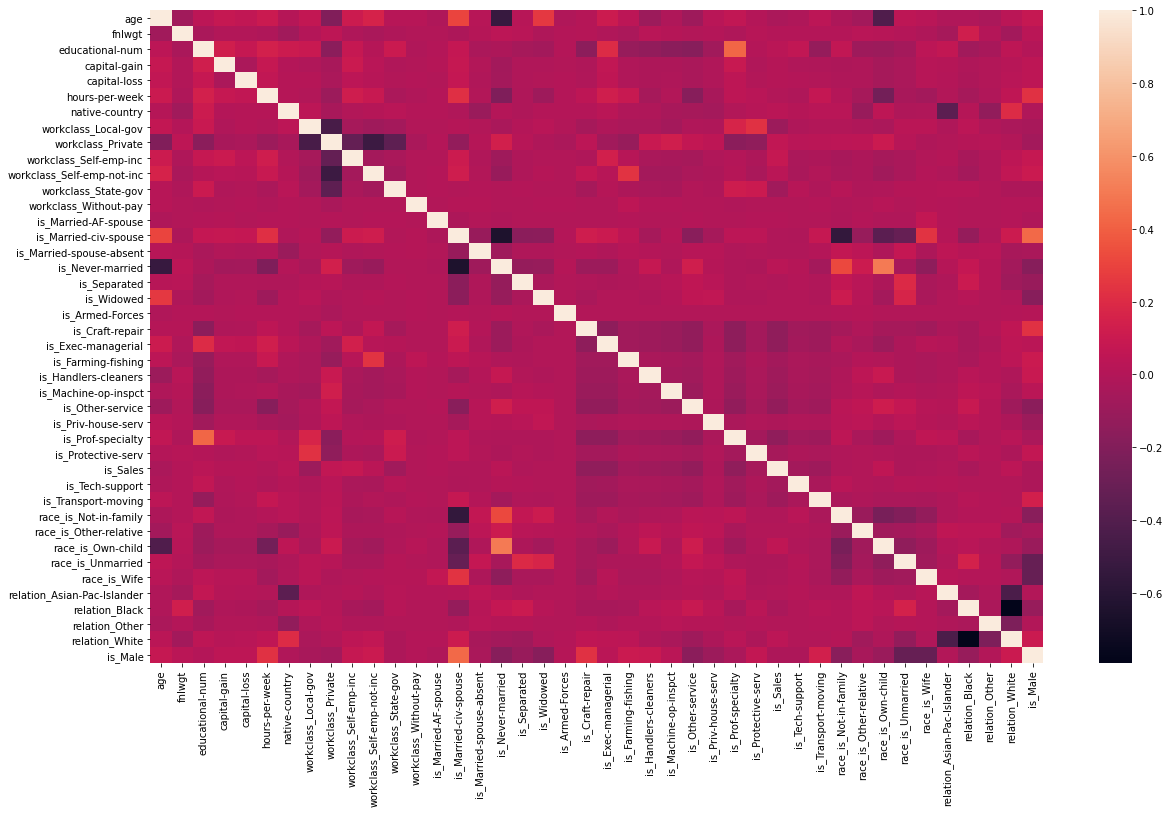

In [38]:
plt.figure(figsize=(20,12))
sns.heatmap(Data.corr())

In [39]:
Data.select_dtypes(exclude=[np.number]).shape

(46033, 2)

## Preparation of Model

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
y = Data.income
X = Data.drop(['income', 'education', 'native-country', 'fnlwgt'],axis=1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier as xgb
from sklearn import metrics

### Baseline Model
In the baseline model, we predict the minority class for all our train and test (or validation) examples. The resulting accuracy will serve as a benchmark for the ML models. In other words, the sophisticated ML models should have an accuracy which should at least better the baseline one.

### Random Forest Classifier

In [44]:
rfmodel = RandomForestClassifier(n_estimators=300,oob_score=True,min_samples_split=5, max_depth=10,random_state=10)
rfmodel.fit(X_train,y_train)
print(rfmodel)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=300,
                       oob_score=True, random_state=10)


In [45]:
def show_classifier_metrics(clf, y_train=y_train,y_test=y_test, print_classification_report=True, print_confusion_matrix=True):
    print(clf)
    if print_confusion_matrix:
        print('Confusion matrix of training data : ')
        print(metrics.confusion_matrix(y_train, clf.predict(X_train)))
        print('Confusion matrix of test data : ')
        print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
    if print_classification_report:
        print('Classification report of test data : ')
        print(metrics.classification_report(y_test, clf.predict(X_test)))
    print('Accuracy on test data : ', (metrics.accuracy_score(y_test, clf.predict(X_test))*100))
    print('Accuracy on training data : ' , (metrics.accuracy_score(y_train, clf.predict(X_train))*100))
    print('Area under the ROC curve : ', (metrics.roc_auc_score(y_test, clf.predict(X_test))))

In [46]:
show_classifier_metrics(rfmodel,y_train)
print('oob score = ', rfmodel.oob_score_)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=300,
                       oob_score=True, random_state=10)
Confusion matrix of training data : 
[[24891  1109]
 [ 3605  4919]]
Confusion matrix of test data : 
[[8211  400]
 [1251 1647]]
Classification report of test data : 
              precision    recall  f1-score   support

       <=50K       0.87      0.95      0.91      8611
        >50K       0.80      0.57      0.67      2898

    accuracy                           0.86     11509
   macro avg       0.84      0.76      0.79     11509
weighted avg       0.85      0.86      0.85     11509

Accuracy on test data :  85.65470501346772
Accuracy on training data :  86.34573050631444


ValueError: could not convert string to float: '>50K'

In [ ]:
importance_list = rfmodel.feature_importances_
name_list = X_train.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.figure(figsize=(20,10))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

### XGBoost

In [ ]:
from xgboost.sklearn import XGBClassifier

In [ ]:
param = {}
param['learning_rate'] = 0.1
param['verbosity'] = 1
param['colsample_bylevel'] = 0.9
param['colsample_bytree'] = 0.9
param['subsample'] = 0.9
param['reg_lambda']= 1.5
param['max_depth'] = 5
param['n_estimators'] = 400
param['seed']=10
xgb= XGBClassifier(**param)
xgb.fit(X_train, y_train, eval_metric=['error'], eval_set=[(X_train, y_train),(X_test, y_test)],early_stopping_rounds=30)

In [ ]:
show_classifier_metrics(xgb,y_train)